# <div style="text-align:center;"> LAB EXERCISE 2 : IMAGE CONTRAST STRETCHING </div>

## Introduction:
Image enhancement is a crucial aspect of image processing that aims to improve the visual quality of images for better analysis and interpretation. One widely used technique for enhancing images is **contrast stretching**, which modifies the range of intensity values in an image to utilize the full spectrum of available pixel values. This process involves identifying the minimum and maximum intensity values present in the image and stretching these values to cover the entire range of intensity levels, typically from 0 to 255 in 8-bit images. By doing so, contrast stretching can significantly improve the visibility of features within an image, making it easier to discern details that may have been obscured in the original. This report outlines the implementation of contrast stretching on a grayscale image, detailing the steps taken, results obtained, and observations made regarding the changes in image quality and pixel distribution. Through this process, we aim to demonstrate the effectiveness of contrast stretching as a method for enhancing image clarity and detail.

In this report, we perform the following tasks on an image to apply contrast stretching:
1. Load and read the image.
2. Convert the image to grayscale.
3. Find the minimum (r_min) and maximum (r_max) pixel intensity values in the grayscale image.
4. Apply the contrast stretching formula to each pixel.
5. Display the contrast-stretched image.
6. Plot the histograms of both the original and the contrast-stretched images.
7. Provide observations based on the image and histogram analysis.

## 1. Download and read the image attached


We begin by loading the original image using OpenCV (`cv2`). The image is displayed using matplotlib to provide a visual reference of the image before any processing is applied.


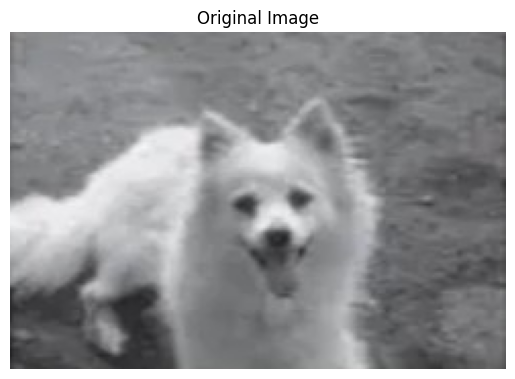

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img_original.jpg')  # Reading the original image

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #Displaying the original image
plt.title("Original Image")
plt.axis('off')
plt.show()

In [3]:
print("Matrix of the original color image:")
print(image)

Matrix of the original color image:
[[[126 125 127]
  [132 131 133]
  [139 138 140]
  ...
  [113 110 112]
  [108 105 107]
  [106 103 105]]

 [[121 120 122]
  [128 127 129]
  [136 135 137]
  ...
  [103 100 102]
  [ 97  94  96]
  [ 92  89  91]]

 [[115 114 116]
  [123 122 124]
  [131 131 131]
  ...
  [ 98  95  97]
  [ 89  86  88]
  [ 82  79  81]]

 ...

 [[ 60  58  58]
  [ 67  65  65]
  [ 73  71  71]
  ...
  [ 99  99  99]
  [ 92  92  92]
  [ 86  86  86]]

 [[ 63  61  61]
  [ 72  70  70]
  [ 81  79  79]
  ...
  [ 95  95  95]
  [ 89  89  89]
  [ 83  83  83]]

 [[ 58  56  56]
  [ 69  67  67]
  [ 81  79  79]
  ...
  [ 93  93  93]
  [ 86  86  86]
  [ 80  80  80]]]


In [4]:
print(f"Original Image Shape (Color): {image.shape}")  # Shape includes height, width, and channels
print(f"Number of Channels: {image.shape[2]}")  # 3 channels (RGB)
print("Number of dimensions in the original color image:", image.ndim) # 3 Dimensions: Height,Width,Third dimension for the color channels

Original Image Shape (Color): (165, 243, 3)
Number of Channels: 3
Number of dimensions in the original color image: 3


## Interpretation of the Original Color Image Properties:

1. **Image Shape**:
   - The image has a shape of **(165, 243, 3)**.
   - This indicates that the image is **165 pixels in height**, **243 pixels in width**, and has **3 channels** for color information (Red, Green, and Blue).
    - The image can be visualized as a **3D matrix**:
    - The first two dimensions define the **spatial structure** (height and width).
    - The third dimension holds the **color information** for each pixel in the form of RGB values, making it a color image.

2. **Number of Channels**:
   - The number of channels is **3**, corresponding to the **RGB color model**.
   - Each pixel in the image contains 3 values, one for each channel: **Red**, **Green**, and **Blue**.

3. **Pixel Representation**:
   - Each pixel in the image is represented by a triplet of values, e.g., **(R, G, B)**, where each value ranges from **0 to 255**.
   - The combination of these values determines the color of the pixel. For example, (255, 0, 0) represents a red pixel, (0, 255, 0) represents green, and so on.

5. **Overall Image Structure**:
   - The image can be visualized as a **3D matrix**:
     - The first two dimensions define the **spatial structure** (height and width).
     - The third dimension holds the **color information** for each pixel in the form of RGB values, making it a color image.




## 2. Convert the image into grayscale image


The image is then converted to grayscale to simplify the analysis by focusing solely on intensity values. Grayscale images have a single intensity channel, unlike color images which have three (R, G, B).

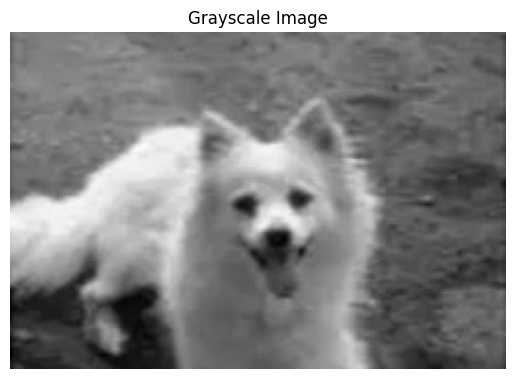

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to grayscale
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [6]:
print("\nMatrix of the grayscale image:")
print(gray_image)


Matrix of the grayscale image:
[[126 132 139 ... 111 106 104]
 [121 128 136 ... 101  95  90]
 [115 123 131 ...  96  87  80]
 ...
 [ 58  65  71 ...  99  92  86]
 [ 61  70  79 ...  95  89  83]
 [ 56  67  79 ...  93  86  80]]


In [7]:
# Print grayscale image properties
print(f"Grayscale Image Shape: {gray_image.shape}")  # Shape includes only height and width
print(f"Number of Channels (Grayscale): 1")  # Only 1 channel (intensity)
print("Number of dimensions in the grayscale image:", gray_image.ndim)# Grayscale images have 2 dimensions:height and width.

Grayscale Image Shape: (165, 243)
Number of Channels (Grayscale): 1
Number of dimensions in the grayscale image: 2


## Interpretation of Grayscale Image Properties
1. **Number of Dimensions**:
   - The grayscale image has **2 dimensions**, which indicate that it can be represented as a 2D array (or matrix).
   - This means each pixel in the image is defined by its position in terms of height and width.

2. **Grayscale Image Shape**:
   - The shape of the grayscale image is **(165, 243)**.
   - This signifies that the image consists of **165 rows** (height) and **243 columns** (width).
   - In total, the image contains **40,395 pixels** (calculated as 165 × 243).

3. **Number of Channels**:
   - A grayscale image has **1 channel**, representing the intensity values of the pixels.
   - This single channel simplifies the representation of the image, focusing solely on brightness.
   - Each pixel's intensity value ranges from **0 to 255**.
   - Here, **0** corresponds to **black**, and **255** corresponds to **white**, with varying shades of gray in between.




## 3. Find the minimum (r min) and maximum (r max) pixel intensity values of the grayscale image

Next, we calculate the minimum (r_min) and maximum (r_max) pixel intensity values in the grayscale image. These values will be used in the contrast stretching formula.

In [8]:
r_min = np.min(gray_image)
r_max = np.max(gray_image)


In [9]:
print(f"Minimum intensity value (r_min): {r_min}")
print(f"Maximum intensity value (r_max): {r_max}")

Minimum intensity value (r_min): 35
Maximum intensity value (r_max): 247


# Interpretation of Intensity Values in the Image

1. **Minimum Intensity Value (r_min): 35**
   - The lowest intensity value in the image is **35**, indicating that the darkest pixel is fairly dark but not completely black, as the minimum possible value in an 8-bit image is 0.

2. **Maximum Intensity Value (r_max): 247**
   - The brightest pixel in the image has an intensity of **247**, which is very close to pure white (255), meaning the image has bright regions but no completely white areas.

## 4. For each and every pixel in the image, apply the above mentioned formula to stretch the contrast


Using the formula s = [255 * (r - r_min)] / (r_max - r_min), we apply contrast stretching to the image. This formula scales the pixel intensities based on the original image's intensity range and maps them to a new range (0-255).

In [10]:
stretched_image = 255 * (gray_image - r_min) / (r_max - r_min) # Applying contrast stretching formula
stretched_image = np.clip(stretched_image, 0, 255)  # Clip values to be within [0, 255]
stretched_image = stretched_image.astype(np.uint8)

## 5. Display the contrasted  image

The contrast-stretched image is displayed to visually inspect how the contrast enhancement has changed the image. This image  has an expanded intensity range compared to the original grayscale image.

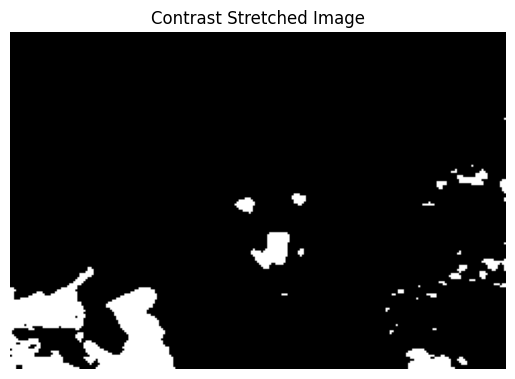

In [11]:
plt.imshow(stretched_image, cmap='gray') #Displaying the new contrast-stretched image
plt.title("Contrast Stretched Image")
plt.axis('off')
plt.show()

### Interpretation of the Contrast-Stretched Image

1. **Enhanced Contrast**:
   - The contrast-stretched image appears with much sharper distinction between light and dark areas. The stretching has significantly altered the pixel intensities, emphasizing bright regions and pushing darker areas closer to black.

2. **Loss of Midtones**:
   - A clear observation is the loss of midtone details. Many areas that originally had varying intensity levels now appear completely black or white, leading to a more binary look with reduced gradient transitions.

3. **Increased Brightness Extremes**:
   - Bright areas have become more pronounced, potentially over-saturated. Some bright regions that were previously detailed now appear completely white, indicating that the stretching algorithm pushed pixel values close to or equal to the maximum intensity (255).

4. **Impact on Image Features**:
   - The details and texture of the original image have been significantly diminished. While the overall contrast is higher, the image suffers from oversimplification, especially in regions that had finer gradations of intensity.


## 6. Display the histogram of both original and new image


Histograms provide a useful way to visualize the distribution of pixel intensities in an image. By comparing the histograms of the original and stretched images, we can observe how contrast stretching affects the pixel intensity distribution.

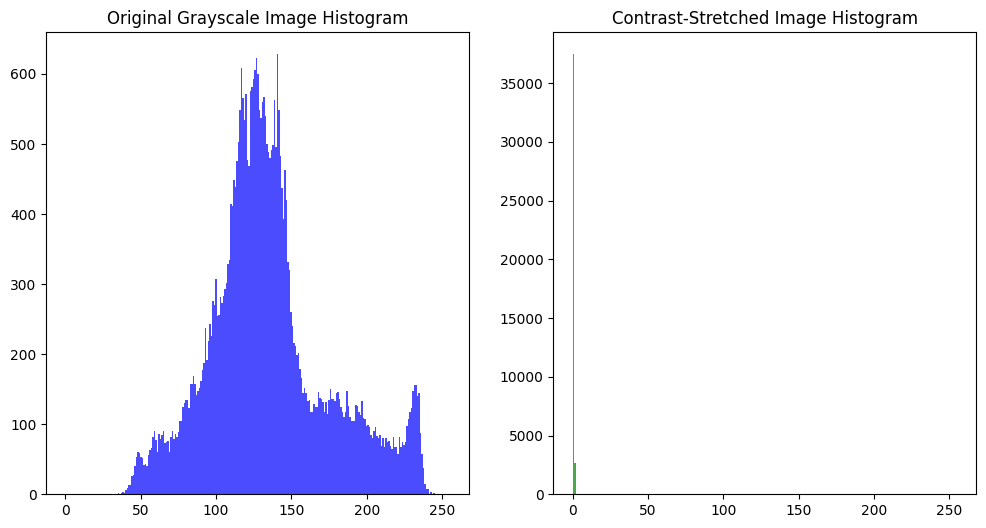

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.hist(gray_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Original Grayscale Image Histogram")

plt.subplot(1, 2, 2)
plt.hist(stretched_image.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title("Contrast-Stretched Image Histogram")

plt.show()


## Interpretation:

1. **Original Grayscale Image Histogram**:
   - The histogram of the original grayscale image spans a **wide range of intensity values** from approximately **35 to 247**.
   - A large portion of the pixel values is concentrated between **100 and 160**, indicating that the image predominantly consists of mid-range grayscale tones.
   - The highest peak is around **130**, showing that most pixels in the image have an intensity close to this value. This suggests a balanced range of grays, neither too dark nor too bright.
   - There are fewer pixels with very dark (close to 0) or very bright (close to 255) intensity values, indicating moderate contrast in the original image.
   - In the original image, the wide distribution of pixel values allowed for more nuanced shading and a more detailed image.

2. **Contrast-Stretched Image Histogram**:
   - The histogram of the contrast-stretched image shows that most pixel values have been pushed towards the lower end, close to **0**.
   - The majority of the pixel intensities fall between **0 and 10**, indicating that most of the image has been rendered very dark, with very few pixels having higher intensity values.
   - The histogram reveals that only a tiny fraction of pixels has intensities beyond **10**, resulting in a significant loss of visual detail in brighter areas.
   -  In the contrast-stretched image, this subtlety has been lost, as the intensities have shifted towards black, causing large portions of the image to appear almost entirely black.
   -  The histogram of the stretched image no longer reflects a wide distribution, but rather a **compressed** range of very dark pixels, reducing the overall quality of the image.

## 7. Observe the changes in terms of image and histogram and give your comments.

### Image Observations:

**Original Image:** The original grayscale image has visible details, but the contrast is somewhat limited, with the intensity values concentrated in the mid-tone range. This makes the image appear somewhat flat, with less distinction between dark and light areas.

**Contrast-Stretched Image:**  After applying contrast stretching, the image shows extreme contrast, where most of the details have been lost, and the image appears almost binary. This is due to the aggressive expansion of intensity values, pushing most of the pixel values either towards 0 (black) or 255 (white), which leads to the loss of intermediate grayscale values.



## Histogram Observations:

**Original Histogram:**  The histogram for the original image shows that the majority of the pixel intensities lie between 100 and 200, indicating that the image has moderate contrast but does not fully utilize the entire range of pixel intensities (0-255).

**Contrast-Stretched Histogram:** The histogram for the contrast-stretched image is highly skewed towards 0, with a small peak near 255. This shows that most of the pixel intensities have been mapped to the lower end of the range, causing the image to become overly dark. Ideally, a more even spread of pixel intensities across the entire range would be expected, but this has not been achieved here.

## Conclusion:
In this exercise, contrast stretching was applied to a grayscale image in an attempt to enhance its contrast. While the method succeeded in expanding the intensity range, it led to an undesirable result where most of the pixel values were pushed to the extremes (0 and 255), resulting in the loss of details and an image with excessive contrast. The histogram analysis confirms that the pixel values were overly concentrated at the lower end of the intensity spectrum, making the image appear too dark.

Future improvements could include modifying the contrast stretching algorithm to avoid over-enhancement, possibly through techniques like clipping or limiting the stretching range to preserve more details and prevent loss of mid-tone information.